In [59]:
from functools import partial
from typing import Optional

import numpy as np
import xarray as xr

In [60]:
from starfish.core.imagestack.imagestack import ImageStack

In [66]:
from starfish.core.image.Filter._base import FilterAlgorithm

In [67]:
from starfish.core.image.Filter.util import determine_axes_to_group_by

In [1]:
from starfish.core.imagestack.imagestack import ImageStack

In [68]:
import starfish.data
from starfish import FieldOfView
experiment = starfish.data.DARTFISH(use_test_data=True)
stack = experiment.fov().get_image(FieldOfView.PRIMARY_IMAGES)
print(stack)

<starfish.ImageStack (r: 6, c: 3, z: 1, y: 190, x: 270)>


In [69]:
from starfish.util.plot import imshow_plane, intensity_histogram

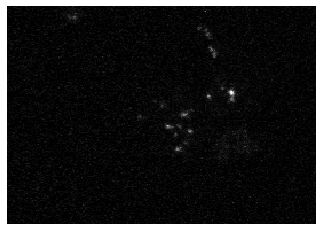

In [72]:
imshow_plane(stack, sel={Axes.ROUND: 0, Axes.CH: 2})

In [3]:
from starfish.core.util import enum
from starfish.core.types import Axes

In [4]:
stack.shape.keys()

odict_keys([<Axes.ROUND: 'r'>, <Axes.CH: 'c'>, <Axes.ZPLANE: 'z'>, 'y', 'x'])

In [7]:
enum.harmonize(stack.shape.keys() - {Axes.CH})

['x', 'r', 'y', 'z']

In [8]:
enum.harmonize({Axes.CH})

['c']

In [15]:
stack.xarray.dims

('r', 'c', 'z', 'y', 'x')

In [16]:
stack.xarray.stack(chunk_key=['x', 'y', 'z']).dims

('r', 'c', 'chunk_key')

In [21]:
stacked = stack.xarray.stack(chunk_key=['x', 'y', 'z']).stack(sort_key=['r', 'c'])

In [22]:
grouped = stacked.groupby('sort_key')
grouped

DataArrayGroupBy, grouped over 'sort_key' 
24 groups with labels (0,, 0), (0,, 1), ..., (5,, 3).

In [40]:
import numpy as np

In [41]:
sorted_stacked = grouped.apply(np.sort)

In [46]:
sorted_stacked[:,4]

<xarray.DataArray (chunk_key: 29360128)>
array([0.        , 0.        , 0.        , ..., 0.8588236 , 0.8588236 ,
       0.89019614], dtype=float32)
Coordinates:
    zc         (chunk_key) float64 5e-05 5e-05 5e-05 5e-05 ... 5e-05 5e-05 5e-05
    yc         (chunk_key) float64 1.605e-05 1.605e-05 ... 4.347e-05 4.347e-05
    xc         (chunk_key) float64 4.233e-05 4.233e-05 ... 4.827e-05 4.827e-05
  * chunk_key  (chunk_key) MultiIndex
  - x          (chunk_key) int64 0 0 0 0 0 0 0 ... 1023 1023 1023 1023 1023 1023
  - y          (chunk_key) int64 0 0 0 0 0 0 0 ... 1023 1023 1023 1023 1023 1023
  - z          (chunk_key) int64 0 1 2 3 4 5 6 7 8 ... 20 21 22 23 24 25 26 27
    sort_key   object (1, 0)

In [49]:
reference = sorted_stacked.mean('sort_key')

In [52]:
reference.unstack("chunk_key")

<xarray.DataArray (x: 1024, y: 1024, z: 28)>
array([[[6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        ...,
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04]],

       [[6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        ...,
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04]],

       [[6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        ...,
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04],
        [6.5359479e-04, 6.5359479e-04, 6.5359479e-04, ...,
         6.5359479e-04, 6.5359479e-04, 6.5359479e-04]],

       ...,

       [[2.7189547e-01, 2.7189547e-01, 2.7189547e-01, ...,
         2.7189547e-01, 2.7189547e-01, 2.7189547e-01],
        [2.7189547e-01, 2.7189547e-01, 2.7189547e-01, ...,
         2.7189547e-01, 2.7189547e-01, 2.7189547e-01],
        [2.7189547e-01, 2.7189547e-01, 2.7189547e-01, ...,
         2.7189547e-01, 2.7189547e-01, 2.7189547e-01],
        ...,
        [3.2156864e-01, 3.2156864e-01, 3.2156864e-01, ...,
         3.2156864e-01, 3.2156864e-01, 3.2156864e-01],
        [3.2156864e-01, 3.2156864e-01, 3.2156864e-01, ...,
         3.2156864e-01, 3.2156864e-01, 3.2156864e-01],
        [3.2156864e-01, 3.2156864e-01, 3.2156864e-01, ...,
         3.2156864e-01, 3.2156864e-01, 3.2156864e-01]],

       [[3.2156864e-01, 3.2156864e-01, 3.2156864e-01, ...,
         3.2156864e-01, 3.2156864e-01, 3.2156864e-01],
        [3.2156864e-01, 3.2156864e-01, 3.2156864e-01, ...,
         3.2156864e-01, 3.2156864e-01, 3.2156864e-01],
        [3.2156864e-01, 3.2156864e-01, 3.2156864e-01, ...,
         3.2156864e-01, 3.2156864e-01, 3.2156864e-01],
        ...,
        [4.0653598e-01, 4.0653598e-01, 4.0653598e-01, ...,
         4.0653598e-01, 4.0653598e-01, 4.0653598e-01],
        [4.0653598e-01, 4.0653598e-01, 4.0653598e-01, ...,
         4.0653598e-01, 4.0653598e-01, 4.0653598e-01],
        [4.0653598e-01, 4.0653598e-01, 4.0653598e-01, ...,
         4.0653598e-01, 4.0653598e-01, 4.0653598e-01]],

       [[4.0653598e-01, 4.0653598e-01, 4.0653598e-01, ...,
         4.0653598e-01, 4.0653598e-01, 4.0653598e-01],
        [4.0653598e-01, 4.0653598e-01, 4.0653598e-01, ...,
         4.0653598e-01, 4.0653598e-01, 4.0653598e-01],
        [4.0653598e-01, 4.0653598e-01, 4.0653598e-01, ...,
         4.0653598e-01, 4.0653598e-01, 4.0653598e-01],
        ...,
        [7.7777785e-01, 7.7908498e-01, 7.7908498e-01, ...,
         7.8692800e-01, 7.8692800

In [54]:
stacked

<xarray.DataArray (chunk_key: 29360128, sort_key: 24)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.01568628,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01568628,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01568628,
        0.        ],
       ...,
       [0.01568628, 0.03137255, 0.        , ..., 0.01568628, 0.03137255,
        0.01568628],
       [0.        , 0.01568628, 0.        , ..., 0.01568628, 0.03137255,
        0.03137255],
       [0.        , 0.03137255, 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
    xc         (chunk_key) float64 4.233e-05 4.233e-05 ... 4.827e-05 4.827e-05
    yc         (chunk_key) float64 1.605e-05 1.605e-05 ... 4.347e-05 4.347e-05
    zc         (chunk_key) float64 5e-05 5e-05 5e-05 5e-05 ... 5e-05 5e-05 5e-05
  * chunk_key  (chunk_key) MultiIndex
  - x          (chunk_key) int64 0 0 0 0 0 0 0 ... 1023 1023 1023 1023 1023 1023
  - y          (chunk_key) int64 0 0 0 0 0 0 0 ... 1023 1023 1023 1023 1023 1023
  - z          (chunk_key) int64 0 1 2 3 4 5 6 7 8 ... 20 21 22 23 24 25 26 27
  * sort_key   (sort_key) MultiIndex
  - r          (sort_key) int64 0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5
  - c          (sort_key) int64 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3

In [6]:
from starfish import FieldOfView

In [ ]:
# Use :py:class:`ImageStack` from example STARmap data
import starfish.data
from starfish import FieldOfView
experiment = starfish.data.STARmap(use_test_data=False)
stack = experiment.fov().get_image(FieldOfView.PRIMARY_IMAGES)
print(stack)

import matplotlib.pyplot as plt
from starfish.types import Axes
from starfish.util.plot import imshow_plane, intensity_histogram

# For visualization purposes we will project the image volume to the x,y plane but
# :py:method:`starfish.util.plot.intensity_histogram` can plot any size :py:class:`ImageStack`
projection = stack.reduce({Axes.ZPLANE}, func="max")

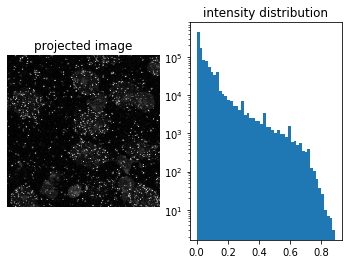

In [13]:
# Plot Figure
#f = plt.figure(dpi=150)
ax1 = plt.subplot(121, aspect='equal')
ax2 = plt.subplot(122, aspect='equal')
# Plot first round and channel of projected :py:class:`ImageStack`
imshow_plane(projection, sel={Axes.ROUND: 0, Axes.CH: 0}, ax=ax1, title='projected image')
# Plot intensity distribution as a histogram
intensity_histogram(projection, sel={Axes.ROUND: 0, Axes.CH: 0}, log=True, bins=50, ax=ax2,
                    title='intensity distribution')
ax1.set_aspect('equal')
ax2.set_aspect(1.0)

In [1]:
import starfish

In [3]:
import starfish.data

In [4]:
experiment = starfish.data.STARmap(use_test_data=False)

In [5]:
fov = experiment.fov()
fov

<starfish.FieldOfView>
  Primary Image: <slicedimage.TileSet (z: 28, r: 6, c: 4, x: 1024, y: 1024)>
  Auxiliary Images:
    

In [10]:
stack = experiment['fov_000'].get_image('primary')

In [11]:
print(stack)

<starfish.ImageStack (r: 6, c: 4, z: 28, y: 1024, x: 1024)>


In [12]:
from showit import image

In [15]:
from starfish.types import Axes

In [33]:
import matplotlib.pyplot as plt

In [26]:
from starfish.util.plot import (
    diagnose_registration, imshow_plane, intensity_histogram
)

In [20]:
projection = stack.reduce(Axes.ZPLANE, func="max")

TypeError: 'Axes' object is not iterable

In [21]:
projection

<starfish.ImageStack (r: 6, c: 4, z: 1, y: 1024, x: 1024)>

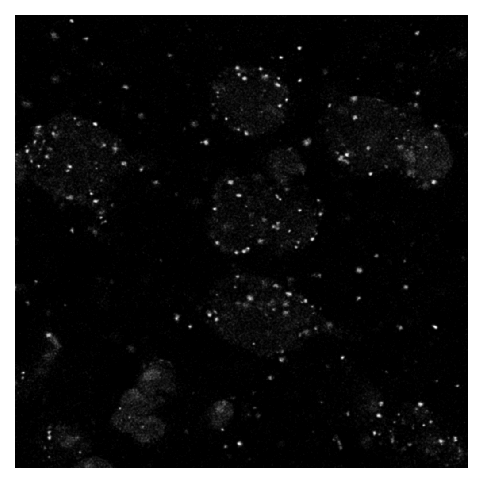

In [40]:
f = plt.figure(dpi=150)
imshow_plane(stack, sel={Axes.ROUND: 0, Axes.CH: 0, Axes.ZPLANE: 0})

ValueError: image_stack must be a 2d (x, y) array, not Frozen({'z': 28, 'y': 1024, 'x': 1024})

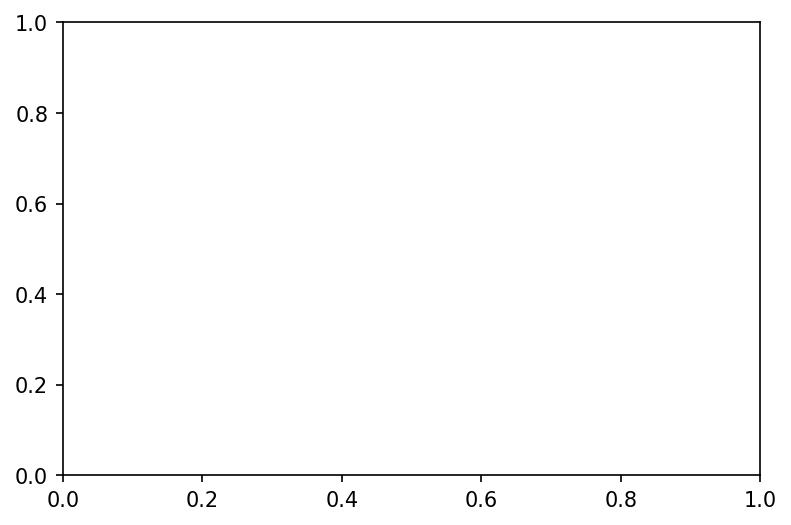

In [46]:
f = plt.figure(dpi=150)
imshow_plane(stack, sel={Axes.ROUND: 0, Axes.CH: 0})

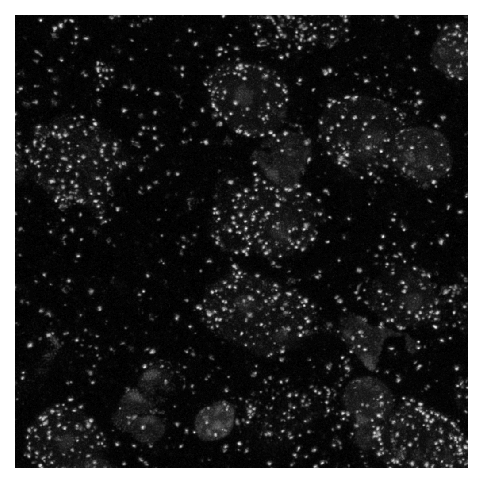

In [34]:
f = plt.figure(dpi=150)
imshow_plane(projection, sel={Axes.ROUND: 0, Axes.CH: 0})


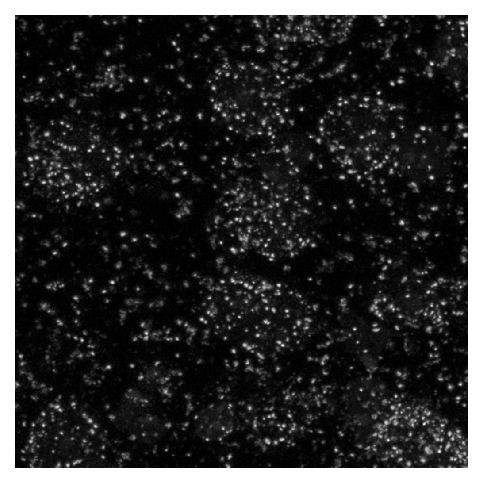

In [36]:
f = plt.figure(dpi=150)
imshow_plane(projection, sel={Axes.ROUND: 0, Axes.CH: 2})

Text(0.5, 1.0, 'Round 0 Ch: 1')

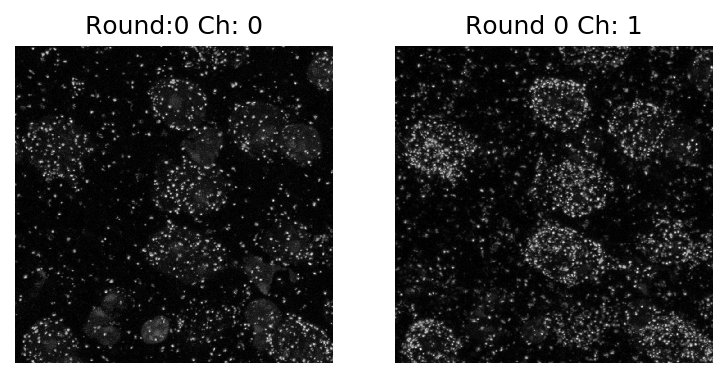

In [37]:
f = plt.figure(dpi=150)
plt.subplot(121)
imshow_plane(projection, sel={Axes.ROUND: 0, Axes.CH: 0})
plt.title('Round:0 Ch: 0')
plt.subplot(122)
imshow_plane(projection, sel={Axes.ROUND: 0, Axes.CH: 1})
plt.title('Round 0 Ch: 1')


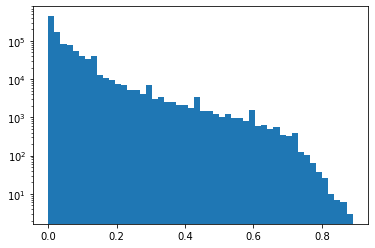

In [38]:
intensity_histogram(projection, sel={Axes.CH: 0, Axes.ROUND: 0}, log=True, bins=50)

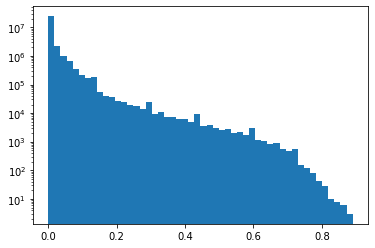

In [47]:
intensity_histogram(stack, sel={Axes.CH: 0, Axes.ROUND: 0}, log=True, bins=50)

In [1]:
%gui qt

import os
from copy import deepcopy
from itertools import product

import numpy as np
import pandas as pd
import skimage.filters
import skimage.morphology
from skimage.transform import SimilarityTransform, warp
from tqdm import tqdm

import starfish
import starfish.data
from starfish.types import Axes, TraceBuildingStrategies

In [2]:
exp = starfish.data.SeqFISH(use_test_data=True)

In [3]:
fov = exp.fov()

In [4]:
fov

<starfish.FieldOfView>
  Primary Image: <slicedimage.TileSet (c: 12, r: 5, z: 29, x: 280, y: 280)>
  Auxiliary Images:
    

In [ ]:
imgs = experiment["fov_000"].get_image(FieldOfView.PRIMARY_IMAGES)
print(imgs)

In [2]:
from typing import Optional, Tuple
from IPython import get_ipython

import starfish
import starfish.data
from starfish import FieldOfView, DecodedIntensityTable
from starfish.types import TraceBuildingStrategies

# equivalent to %gui qt
ipython = get_ipython()
ipython.magic("gui qt5")

In [3]:
experiment = starfish.data.allen_smFISH(use_test_data=False)

In [4]:
fov = experiment.fov()
fov

<starfish.FieldOfView>
  Primary Image: <slicedimage.TileSet (z: 34, c: 3, r: 9, x: 2048, y: 2048)>
  Auxiliary Images:
    nuclei: <slicedimage.TileSet (z: 34, c: 1, r: 1, x: 2048, y: 2048)>

In [1]:
# This tutorial will use in situ sequencing (ISS) data that has been filtered and registered.

import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from showit import image
from starfish.image import ApplyTransform, LearnTransform
from starfish.image import Filter
from starfish.types import Axes

from starfish import data, FieldOfView

In [2]:
matplotlib.rcParams["figure.dpi"] = 150

use_test_data = os.getenv("USE_TEST_DATA") is not None

In [3]:
experiment = data.STARmap()

In [8]:
fov = experiment.fov()

In [12]:
fov

<starfish.FieldOfView>
  Primary Image: <slicedimage.TileSet (c: 4, r: 6, z: 28, x: 1024, y: 1024)>
  Auxiliary Images:
    

In [13]:
experiment_ISS = data.ISS()
fov_ISS = experiment_ISS.fov()
fov_ISS

<starfish.FieldOfView>
  Primary Image: <slicedimage.TileSet (c: 4, z: 1, r: 4, x: 1390, y: 1044)>
  Auxiliary Images:
    nuclei: <slicedimage.TileSet (c: 1, z: 1, r: 1, x: 1390, y: 1044)>
    dots: <slicedimage.TileSet (c: 1, z: 1, r: 1, x: 1390, y: 1044)>

In [9]:
stack = experiment['fov_000'].get_image('primary')

In [10]:
stack

<starfish.ImageStack (r: 6, c: 4, z: 28, y: 1024, x: 1024)>

In [12]:
from starfish.util.plot import imshow_plane

100%|██████████| 28/28 [00:00<00:00, 200.70it/s]


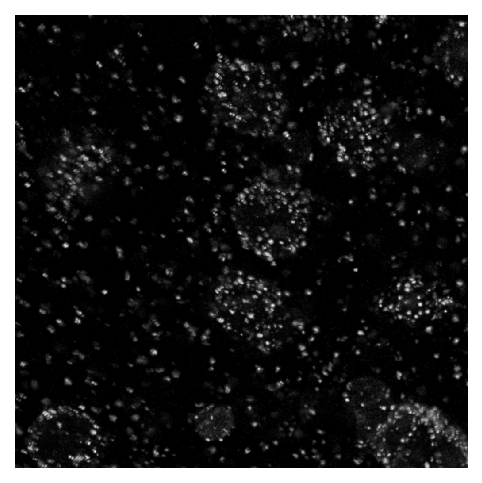

In [13]:
ch_r_max_projection = stack.reduce({Axes.CH, Axes.ROUND}, func="max")

f = plt.figure(dpi=150)
imshow_plane(ch_r_max_projection, sel={Axes.ZPLANE: 15})

In [1]:





experiment = data.ISS(use_test_data=use_test_data)
fov = experiment.fov()

imgs = fov.get_image(FieldOfView.PRIMARY_IMAGES) # primary images
dots = fov.get_image("dots") # reference round for image registration
nuclei = fov.get_image("nuclei") # nuclei`

# filter raw data
masking_radius = 15
filt = Filter.WhiteTophat(masking_radius, is_volume=False)

filt.run(imgs, in_place=True)

filt.run(dots, in_place=True)

filt.run(nuclei, in_place=True)

# register primary images to reference round
learn_translation = LearnTransform.Translation(reference_stack=dots, axes=Axes.ROUND, upsampling=1000)

transforms_list = learn_translation.run(imgs.reduce({Axes.CH, Axes.ZPLANE}, func="max"))

warp = ApplyTransform.Warp()

warp.run(imgs, transforms_list=transforms_list, in_place=True)

100%|██████████| 4/4 [00:00<00:00, 147.97it/s]


In [2]:
from starfish.morphology import Binarize, Filter, Merge, Segment
from starfish.types import Levels

dapi_thresh = .18  # binary mask for cell (nuclear) locations
stain_thresh = .22  # binary mask for overall cells // binarization of stain
min_dist = 57
min_allowed_size = 10
max_allowed_size = 10000

100%|██████████| 1/1 [00:00<00:00, 221.29it/s]


Text(0.5, 1.0, 'Stain')

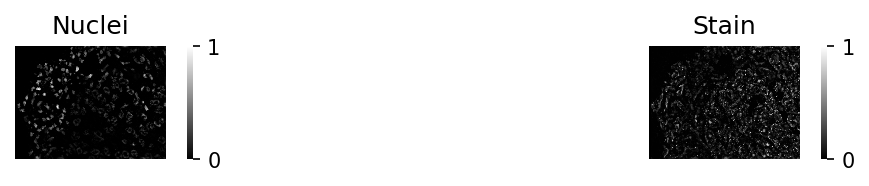

In [9]:
mp = imgs.reduce({Axes.CH, Axes.ZPLANE}, func="max")
stain = mp.reduce(
    {Axes.ROUND},
    func="mean",
    level_method=Levels.SCALE_BY_IMAGE)

nuclei_mp_scaled = nuclei.reduce(
    {Axes.ROUND, Axes.CH, Axes.ZPLANE},
    func="max",
    level_method=Levels.SCALE_BY_IMAGE)

f = plt.figure(figsize=(10,1))
ax1 = f.add_subplot(121)
nuclei_numpy = nuclei_mp_scaled._squeezed_numpy(Axes.ROUND, Axes.CH, Axes.ZPLANE)
image(nuclei_numpy, ax=ax1, size=20, bar=True)
plt.title('Nuclei')

ax2 = f.add_subplot(122)
image(
    stain._squeezed_numpy(Axes.ROUND, Axes.CH, Axes.ZPLANE),
    ax=ax2, size=20, bar=True)
plt.title('Stain')